# Data Pre-Processing

Now that the scraper is built and functioning, we're able to obtain a dataset.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import re
import string

import spacy

## Choosing the dataset

The data was obtained using a web crawler (`main_crawler.py`). This program takes as input a list of terms and uses them to search the different journals of the andorran press for articles and comments.

explanation of dataset choices

### Hot topics

The dataset was obtained by scraping based on the topics that are most talked about lately among the Andorran people, and that generate the most debate and talk in the press and among the citizens:

- Acord d'associació amb la Unió Europea
    - Europa
    - Unió Europea
    - Acord d'associació
- Reforma del sistema de pensions
    - Pensions
    - CASS
- Estat del Català
    - Català
    - Llengua
- Drets de la dona i avortament
    - Avortament
    - Dones
- Crisi de l'habitatge
    - Habitatge
    - Lloguer
    - Inversió extrangera

### The resulting datasets

In [3]:
dtype_comments = {
    'comment_in_answer_to': 'str'
    # the other column types will be inferred
}

In [4]:
articles = pd.read_csv("../data/scrapes/HOT_TOPICS/20240929_HOT_TOPICS_articles.csv", parse_dates=['datetime_added', 'datetime_article'])
comments = pd.read_csv("../data/scrapes/HOT_TOPICS/20240929_HOT_TOPICS_comments.csv", dtype=dtype_comments, parse_dates=['comment_datetime'])

In [5]:
comments.shape

(2413, 9)

## Exploring the datasets.

In [6]:
articles.head()

,id,datetime_added,journal,search_term,datetime_article,category,type,title,link,nb_of_comments
0,AL20240928185200,2024-09-29 15:41:39.308837,altaveu,europa,2024-09-28 18:52:00,esport,article,Jordina Caminal s’emporta la Copa de Sud-Amèri...,https://www.altaveu.com/actualitat/esport/jord...,0
1,AL20240916175300,2024-09-29 15:41:39.308837,altaveu,europa,2024-09-16 17:53:00,politica,article,SDP advoca per un espai transversal de centre ...,https://www.altaveu.com/actualitat/politica/sd...,2
2,AL20240908122700,2024-09-29 15:41:39.308837,altaveu,europa,2024-09-08 12:27:00,politica,article,Acord en cercar “consens” i “confluències” sob...,https://www.altaveu.com/actualitat/politica/ac...,3
3,AL20240905104400,2024-09-29 15:41:39.308837,altaveu,europa,2024-09-05 10:44:00,afers exteriors,article,Pas endavant del conveni del Consell d’Europa ...,https://www.altaveu.com/actualitat/afers-exter...,2
4,AL20240926204600,2024-09-29 15:41:39.308837,altaveu,acord d'associació,2024-09-26 20:46:00,afers exteriors,article,Espot confia en el suport d’Espanya i Portugal...,https://www.altaveu.com/actualitat/afers-exter...,4


In [7]:
comments.head()

,comment_id,article_id,comment_author,comment_datetime_displayed,comment_datetime,comment_content,comment_in_answer_to,comment_likes,comment_dislikes
0,AL20240916175300-224727,AL20240916175300,didiesc,Fa 12 dies,NaT,""" la formació ha expressat el ‘sí’ en el refer...",NaN,0.0,0.0
1,AL20240916175300-224606,AL20240916175300,Misco Jones,Fa 13 dies,NaT,"Ara són de centre? SPD, l’arc de sant martí de...",NaN,21.0,10.0
2,AL20240908122700-223399,AL20240908122700,Pere,Fa 21 dies,NaT,El problema de DA es que creuen amb la seva ve...,NaN,7.0,1.0
3,AL20240908122700-223441,AL20240908122700,Pere,Fa 21 dies,NaT,Governar? però ja han començat a fer-ho? Tu c...,NaN,3.0,2.0
4,AL20240908122700-223405,AL20240908122700,Xd,Fa 21 dies,NaT,Em sembla que confoneu escoltar amb governar. ...,NaN,7.0,7.0


In [8]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2413 entries, 0 to 2412
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   comment_id                  2413 non-null   object        
 1   article_id                  2413 non-null   object        
 2   comment_author              2413 non-null   object        
 3   comment_datetime_displayed  2388 non-null   object        
 4   comment_datetime            2154 non-null   datetime64[ns]
 5   comment_content             2413 non-null   object        
 6   comment_in_answer_to        953 non-null    object        
 7   comment_likes               234 non-null    float64       
 8   comment_dislikes            234 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 169.8+ KB


In [9]:
print(len(comments[~comments['comment_in_answer_to'].isnull()]))
print(len(comments[comments['comment_in_answer_to'].isnull()]))

953
1460


In [10]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                488 non-null    object        
 1   datetime_added    488 non-null    datetime64[ns]
 2   journal           488 non-null    object        
 3   search_term       488 non-null    object        
 4   datetime_article  488 non-null    datetime64[ns]
 5   category          488 non-null    object        
 6   type              488 non-null    object        
 7   title             488 non-null    object        
 8   link              488 non-null    object        
 9   nb_of_comments    488 non-null    int64         
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 38.3+ KB


In [11]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2413 entries, 0 to 2412
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   comment_id                  2413 non-null   object        
 1   article_id                  2413 non-null   object        
 2   comment_author              2413 non-null   object        
 3   comment_datetime_displayed  2388 non-null   object        
 4   comment_datetime            2154 non-null   datetime64[ns]
 5   comment_content             2413 non-null   object        
 6   comment_in_answer_to        953 non-null    object        
 7   comment_likes               234 non-null    float64       
 8   comment_dislikes            234 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 169.8+ KB


How many articles have comments?

In [12]:
print(f"Number of articles: {len(articles)}")
print(f"Number of articles with comments: {len(articles[articles['nb_of_comments'] > 0])}")

Number of articles: 488
Number of articles with comments: 235


How many articles for each search term?

In [13]:
articles_per_search_term = articles.groupby('search_term').size().sort_values()
articles_per_search_term

search_term
acord d'associació     6
avortament            13
lloguer               20
pensions              26
llengua               29
CASS                  37
unió europea          37
dones                 62
habitatge             76
europa                89
català                93
dtype: int64

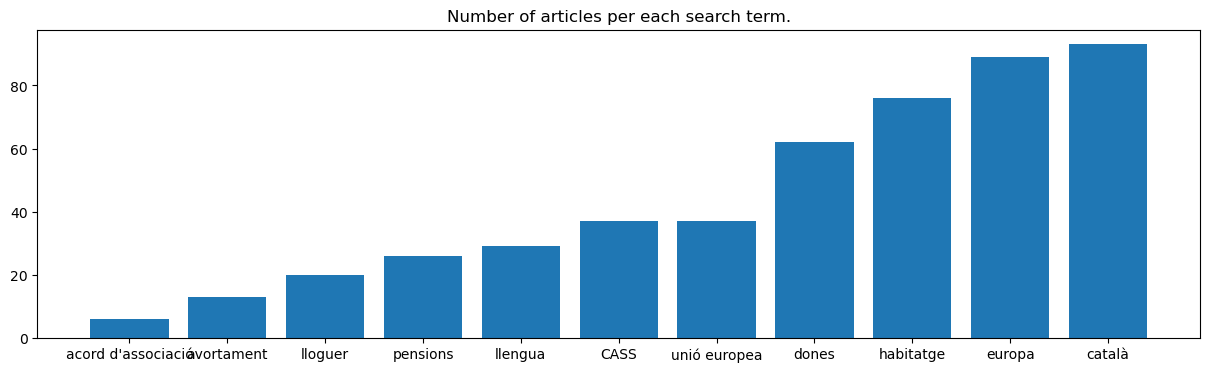

In [14]:
fig, ax = plt.subplots(figsize=(15,4))
ax.bar(list(articles_per_search_term.index), articles_per_search_term)
ax.set_title("Number of articles per each search term.")
plt.show()

How about for each topic?

In [15]:
topics = {
    'europa':               'UE',
    'unió europea':         'UE',
    "acord d'associació":   'UE',
    'pensions':             'pensions',
    'CASS':                 'pensions',
    'català':               'catala',
    'llengua':              'catala',
    'avortament':           'avortament',
    'dones':                'avortament',
    'habitatge':            'habitatge',
    'lloguer':              'habitatge',
    'inversió extrangera':  'habitatge'
}

In [16]:
articles['topic'] = articles['search_term'].apply(lambda search_term: topics[search_term])

In [17]:
articles_per_topic = articles.groupby('topic').size().sort_values()
articles_per_topic

topic
pensions       63
avortament     75
habitatge      96
catala        122
UE            132
dtype: int64

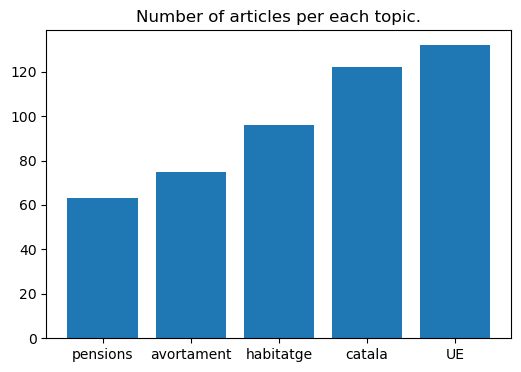

In [18]:
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(list(articles_per_topic.index), articles_per_topic)
ax.set_title("Number of articles per each topic.")
plt.show()

_The UE and the Catalan language law are the most current topics! Seeing as this dataset is from recent articles this distribution makes sense._

How about the type of article? opinion? interview? simple news?

In [19]:
articles['type'].value_counts()

type
article      435
opinion       48
interview      3
report         2
Name: count, dtype: int64

How many comments do the opinion articles have vs. the news?

In [20]:
comments['article_type'] = comments.join(articles.set_index('id'), on='article_id', lsuffix='article')['type']

In [21]:
comments.groupby('article_type').size()

article_type
article    2155
opinion     226
report       32
dtype: int64

How many comments total for each topic?

In [22]:
comments['topic'] = comments.join(articles.set_index('id'), on='article_id', lsuffix='article')['topic']

In [23]:
comments_per_topic = comments.groupby('topic').size().sort_values()
comments_per_topic

topic
pensions      321
avortament    343
catala        519
habitatge     550
UE            680
dtype: int64

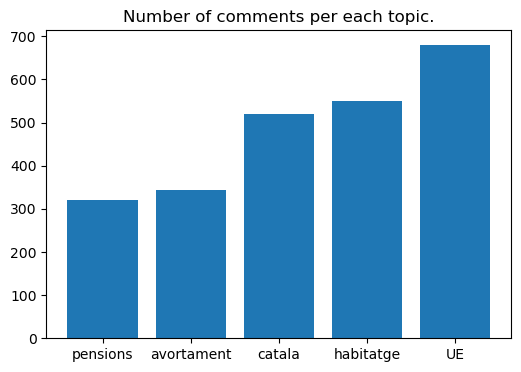

In [24]:
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(list(comments_per_topic.index), comments_per_topic)
ax.set_title("Number of comments per each topic.")
plt.show()

In [25]:
df_comments_per_topic = comments_per_topic.to_frame(name='nb_of_comments')
df_articles_per_topic = articles_per_topic.to_frame(name='nb_of_articles')

In [26]:
topic_presence = df_articles_per_topic.join(df_comments_per_topic)
topic_presence

,nb_of_articles,nb_of_comments
topic,,
pensions,63,321
avortament,75,343
habitatge,96,550
catala,122,519
UE,132,680


In [27]:
topic_presence['avg_comments'] = topic_presence['nb_of_comments']/topic_presence['nb_of_articles']
topic_presence = topic_presence.sort_values('avg_comments')
topic_presence

,nb_of_articles,nb_of_comments,avg_comments
topic,,,
catala,122,519,4.254098
avortament,75,343,4.573333
pensions,63,321,5.095238
UE,132,680,5.151515
habitatge,96,550,5.729167


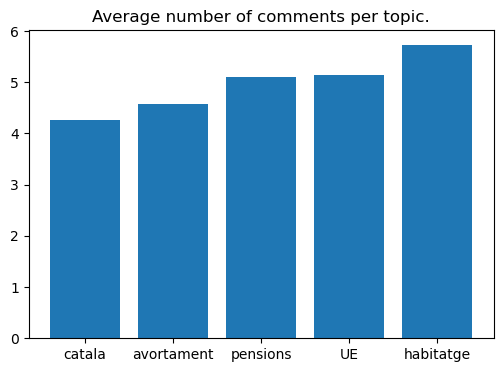

In [28]:
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(list(topic_presence.index), topic_presence['avg_comments'])
ax.set_title("Average number of comments per topic.")
plt.show()

## Adding article title to the input text.

For the purpose of training the model, it might be beneficial for the input text to include the article title, so as to give context to what the comments are referencing.

In [29]:
articles.head()

,id,datetime_added,journal,search_term,datetime_article,category,type,title,link,nb_of_comments,topic
0,AL20240928185200,2024-09-29 15:41:39.308837,altaveu,europa,2024-09-28 18:52:00,esport,article,Jordina Caminal s’emporta la Copa de Sud-Amèri...,https://www.altaveu.com/actualitat/esport/jord...,0,UE
1,AL20240916175300,2024-09-29 15:41:39.308837,altaveu,europa,2024-09-16 17:53:00,politica,article,SDP advoca per un espai transversal de centre ...,https://www.altaveu.com/actualitat/politica/sd...,2,UE
2,AL20240908122700,2024-09-29 15:41:39.308837,altaveu,europa,2024-09-08 12:27:00,politica,article,Acord en cercar “consens” i “confluències” sob...,https://www.altaveu.com/actualitat/politica/ac...,3,UE
3,AL20240905104400,2024-09-29 15:41:39.308837,altaveu,europa,2024-09-05 10:44:00,afers exteriors,article,Pas endavant del conveni del Consell d’Europa ...,https://www.altaveu.com/actualitat/afers-exter...,2,UE
4,AL20240926204600,2024-09-29 15:41:39.308837,altaveu,acord d'associació,2024-09-26 20:46:00,afers exteriors,article,Espot confia en el suport d’Espanya i Portugal...,https://www.altaveu.com/actualitat/afers-exter...,4,UE


In [30]:
comments['article_title'] = comments.join(articles.set_index('id'), on='article_id', lsuffix='comments')['title']

In [31]:
comments.head()

,comment_id,article_id,comment_author,comment_datetime_displayed,comment_datetime,comment_content,comment_in_answer_to,comment_likes,comment_dislikes,article_type,topic,article_title
0,AL20240916175300-224727,AL20240916175300,didiesc,Fa 12 dies,NaT,""" la formació ha expressat el ‘sí’ en el refer...",NaN,0.0,0.0,article,UE,SDP advoca per un espai transversal de centre ...
1,AL20240916175300-224606,AL20240916175300,Misco Jones,Fa 13 dies,NaT,"Ara són de centre? SPD, l’arc de sant martí de...",NaN,21.0,10.0,article,UE,SDP advoca per un espai transversal de centre ...
2,AL20240908122700-223399,AL20240908122700,Pere,Fa 21 dies,NaT,El problema de DA es que creuen amb la seva ve...,NaN,7.0,1.0,article,UE,Acord en cercar “consens” i “confluències” sob...
3,AL20240908122700-223441,AL20240908122700,Pere,Fa 21 dies,NaT,Governar? però ja han començat a fer-ho? Tu c...,NaN,3.0,2.0,article,UE,Acord en cercar “consens” i “confluències” sob...
4,AL20240908122700-223405,AL20240908122700,Xd,Fa 21 dies,NaT,Em sembla que confoneu escoltar amb governar. ...,NaN,7.0,7.0,article,UE,Acord en cercar “consens” i “confluències” sob...


In [32]:
comments['input_text'] = comments.apply(lambda row: f"[ARTICLE TITLE] {row['article_title']} {row['comment_content']}", axis=1)

In [33]:
comments['input_text']

0       [ARTICLE TITLE] SDP advoca per un espai transv...
1       [ARTICLE TITLE] SDP advoca per un espai transv...
2       [ARTICLE TITLE] Acord en cercar “consens” i “c...
3       [ARTICLE TITLE] Acord en cercar “consens” i “c...
4       [ARTICLE TITLE] Acord en cercar “consens” i “c...
                              ...                        
2408    [ARTICLE TITLE] L’atropellament mortal força c...
2409    [ARTICLE TITLE] L’atropellament mortal força c...
2410    [ARTICLE TITLE] L’atropellament mortal força c...
2411    [ARTICLE TITLE] L’atropellament mortal força c...
2412    [ARTICLE TITLE] L’atropellament mortal força c...
Name: input_text, Length: 2413, dtype: object

## Labeling

### Getting a subset of the data to manually label

We can obtain a subset using different approaches:

The goal is to obtain a diverse subset that will represent the main dataset as much as possible.

We have comments based on:

- The article they were posted in.
- The topic they relate to.

We could choose to get more comments from a more prominent topic, but since we want our model to have variety for each of the topics to be able to understand them all well, we'll choose 50 comments for each topic.

For this initial phase of the project, we'll discard the comments that are in inswer to other comments. Treating them individually would lead to noise and misdirecting sentiments.

We will also only consider artcles that are not opinion pieces, as those should be treated differently.

In [34]:
samples = []
for topic in ['UE', 'pensions', 'catala', 'avortament', 'habitatge']:
    samples.append(comments[(comments['topic'] == topic) & (comments['comment_in_answer_to'].isnull()) & (comments['article_type'] == "article")].sample(n=50, random_state=42))

comments_subset = pd.concat(samples, ignore_index=True)

In [35]:
comments_subset.shape

(250, 13)

In [36]:
comments_subset.groupby('topic').size()

topic
UE            50
avortament    50
catala        50
habitatge     50
pensions      50
dtype: int64

### Keeping only the needed columns

To be able to manually label the dataset, before saving it to a file format where we can easily manipulate it manually, we'll go ahead and only keep the columns that are strictly necessary.

In [37]:
comments_subset.head()

,comment_id,article_id,comment_author,comment_datetime_displayed,comment_datetime,comment_content,comment_in_answer_to,comment_likes,comment_dislikes,article_type,topic,article_title,input_text
0,DI20240928055300-19060429,DI20240928055300,la viga i la palla,"9/28/2024, 5:06:57 AM",2024-09-28 05:06:57,Això del atac a civils inclou lo que heu fet a...,NaN,NaN,NaN,article,UE,Espot defensa a l’ONU que “res no justifica l’...,[ARTICLE TITLE] Espot defensa a l’ONU que “res...
1,AL20240920205600-225417,AL20240920205600,Van der Lying,Fa 2 dies,NaT,On estan aquestes garanties? Jo no les vec enl...,NaN,9.0,0.0,article,UE,L’Elisi assegura que l’acord d’associació “no ...,[ARTICLE TITLE] L’Elisi assegura que l’acord d...
2,DI20240918054400-16312485,DI20240918054400,Josep,"9/17/2024, 11:27:17 PM",2024-09-17 23:27:17,Ben fet!.,NaN,NaN,NaN,article,UE,Espot avisa que la intervenció dels pisos no t...,[ARTICLE TITLE] Espot avisa que la intervenció...
3,DI20240914061600-16043979,DI20240914061600,El Club,"9/13/2024, 11:47:45 PM",2024-09-13 23:47:45,"En lloc de tocar la flauta toquen la guitarra,...",NaN,NaN,NaN,article,UE,Andorra i la UE avancen en l’acord per al cont...,[ARTICLE TITLE] Andorra i la UE avancen en l’a...
4,AL20240920205600-225368,AL20240920205600,..,Fa 2 dies,NaT,No...si ja sabem que no hi hauria un tsunami d...,NaN,51.0,5.0,article,UE,L’Elisi assegura que l’acord d’associació “no ...,[ARTICLE TITLE] L’Elisi assegura que l’acord d...


What is necessary is just the input text.

To be able to easily access the article webpage in case of need, i'll add the links to the file.

For better readability and ease, i'll include the article_title and only show as input text the comment chain

In [38]:
comments_subset_export = comments_subset[['topic', 'article_id', 'comment_id', 'comment_content']].copy()
comments_subset_export[['article_link', 'article_title', 'article_type']] = comments_subset_export.join(articles.set_index('id'), on='article_id', lsuffix='comments')[['link', 'title', 'type']]

In [39]:
comments_subset_export = comments_subset_export[['article_id', 'comment_id', 'article_link', 'topic', 'article_type', 'article_title', 'comment_content']]

In [40]:
comments_subset_export

,article_id,comment_id,article_link,topic,article_type,article_title,comment_content
0,DI20240928055300,DI20240928055300-19060429,https://www.diariandorra.ad/nacional/240928/es...,UE,article,Espot defensa a l’ONU que “res no justifica l’...,Això del atac a civils inclou lo que heu fet a...
1,AL20240920205600,AL20240920205600-225417,https://www.altaveu.com/actualitat/politica/el...,UE,article,L’Elisi assegura que l’acord d’associació “no ...,On estan aquestes garanties? Jo no les vec enl...
2,DI20240918054400,DI20240918054400-16312485,https://www.diariandorra.ad/nacional/240918/es...,UE,article,Espot avisa que la intervenció dels pisos no t...,Ben fet!.
3,DI20240914061600,DI20240914061600-16043979,https://www.diariandorra.ad/nacional/240914/an...,UE,article,Andorra i la UE avancen en l’acord per al cont...,"En lloc de tocar la flauta toquen la guitarra,..."
4,AL20240920205600,AL20240920205600-225368,https://www.altaveu.com/actualitat/politica/el...,UE,article,L’Elisi assegura que l’acord d’associació “no ...,No...si ja sabem que no hi hauria un tsunami d...
...,...,...,...,...,...,...,...
245,DI20240927162300,DI20240927162300-17075213,https://www.diariandorra.ad/esports/240927/tre...,habitatge,article,Trencat l'acord per al nou estadi,A l’espera que el rugbi és deixi tornar s comp...
246,DI20240913060800,DI20240913060800-16035034,https://www.diariandorra.ad/nacional/240913/da...,habitatge,article,DA veta que Espot comparegui per Grifols,"A casa nostra , d'això en diem : ""amb la cua e..."
247,BO20240917010004,BO20240917010004-0,https://www.bondia.ad/economia/la-cea-demana-f...,habitatge,article,La CEA demana flexibilitzar de nou l’arribada ...,Mare meva aquets de la CEA sou uns impresentab...
248,AL20240920090100,AL20240920090100-225333,https://www.altaveu.com/actualitat/societat/tr...,habitatge,article,La ‘trampa del fill’ o increments de lloguer a...,La ley inmobiliaria está hecha con el C _ _ O....


In [41]:
import csv

In [42]:
comments_subset_export.to_csv("comments_subset.csv", index_label="index", sep=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

## Export the whole comments dataset with the input text and all the info we added.

In [43]:
comments.to_csv("comments.csv", index_label="index", sep=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)